# <center>Блок 4. Введение в машинное обучение<center>
## <center>ML-3. Обучение с учителем: классификация<center>
### <center>1.Введение<center>
### <center>2.Логистическая регрессия<center>
#### <center>Общее представление о логистической регрессии<center>

In [1]:
# Задание 2.5
z = 1 + 5*0.3 - 0.3*3
p = 1 / (1+2.718**-z)
print(round(p,2))

0.83


#### <center>Поиск параметров логистической регрессии<center>
#### <center>Логистическая регрессия в sklearn<center>

In [2]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

import warnings #для игнорирования предупреждений
# Игнорируем предупреждения
warnings.filterwarnings('ignore')

# Устанавливаем стиль визуализации в matplotlib
%matplotlib inline
#plt.style.use('seaborn')

In [3]:
diabetes_data = pd.read_csv('C:\IDE\data\Block_4\diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


In [4]:
print(diabetes_data.shape)

(757, 8)


<Axes: >

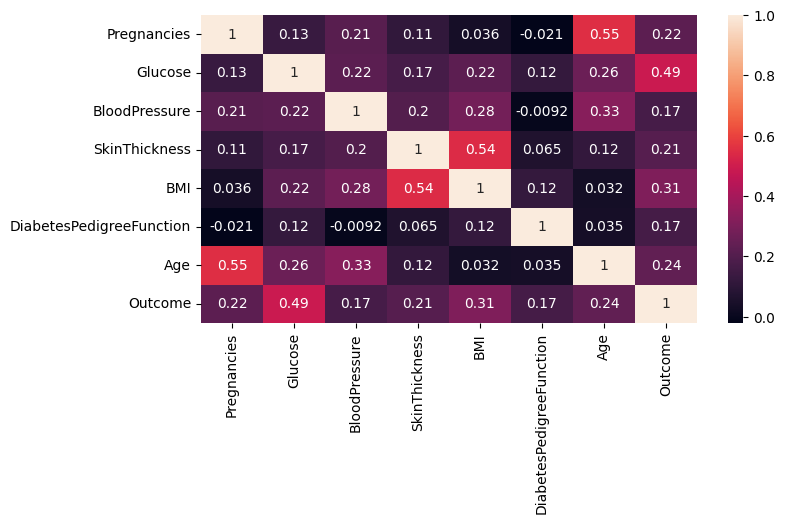

In [5]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(diabetes_data.corr(), annot=True)

Text(0.5, 1.0, 'Scatter Plot for Glucose VS BMI')

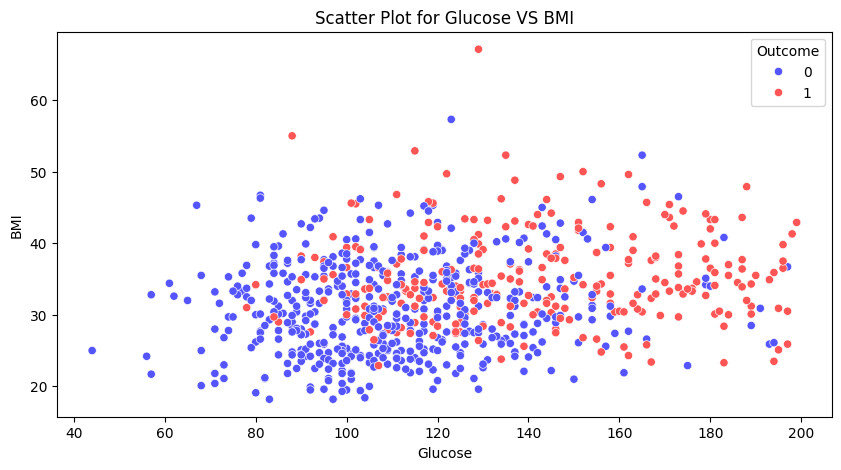

In [6]:
fig, ax = plt.subplots(figsize=(10,5)) #фигура + координатная плоскость
# Строим диаграмму рассеивания
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax #координатная плоскость
);
# Задаем название графику
ax.set_title('Scatter Plot for Glucose VS BMI')

In [7]:
# создаем матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [8]:
from sklearn import linear_model #линейные модели

In [9]:
# Создаем обьект класса LinearRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)
# Обучаем модель минимизируя logloss
log_reg_2d.fit(X, y)
# Выводим результирующие коэффициенты
print('w0: {}'.format(log_reg_2d.intercept_))
print('w1, w2: {}'.format(log_reg_2d.coef_))

w0: [-8.24901758]
w1, w2: [[0.03779291 0.08757414]]


In [10]:
# Значение глюкозы и BMI для пациента
x_new = pd.DataFrame({'Glucose': [180], 'BMI': [51]})
# Делаем предсказание вероятностей
y_new_proba_predict = log_reg_2d.predict_proba(x_new)
print('Predicted probabilites: {}'.format(np.round(y_new_proba_predict,2)))

Predicted probabilites: [[0.05 0.95]]


In [11]:
# Делаем предсказание класса
y_new_predict = log_reg_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

Predicted class: [1]


In [16]:
# Функция для визуализации модели
def plot_probabilities(X, y, model):
    # Генерируем координатную сетку для всех возможных значений для признаков
    # Glucose изменяется от x1_min = 44 до x1_max = 199
    # BMI - от x2_min = 18.2 до x2_max = 67.1
    # Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:,0].min()-1, X.iloc[:,0].max()+1, 0.1),
        np.arange(X.iloc[:,1].min()-1, X.iloc[:,1].max()+1, 0.1)
    )
    # Вытягиваем каждый из массивов в вектор столбец - reshape(-1,1)
    # Обьединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1,1), xx2.reshape(-1,1)])
    # Предсказываем вероятность для всех точек на координатной сетке
    # Нам нужна вероятность класса 1
    probs = model.predict_proba(X_net)[:,1]
    # Преобразуем столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    # Создаем фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize=(10,5))
    # Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1,xx2,probs,100,cmap='bwr')
    # Рисуем разделяющую плоскость - линию, где вероятность равна 0.5
    bound = ax.contour(xx1,xx2,probs,[0.5],linewidths=2,colors='black')
    # Добавляем цветовую панель
    colorbar = fig.colorbar(contour)
    # Накладываем поверх тепловой карты диаграмму рассеивания
    sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y, palette='seismic', ax=ax)
    # даем граффику название
    ax.set_title('Scatter Plot with Descision Boundary');
    # Смещаем легенду в верхний левый угол вне граффика
    ax.legend(bbox_to_anchor=(-0.05,1))

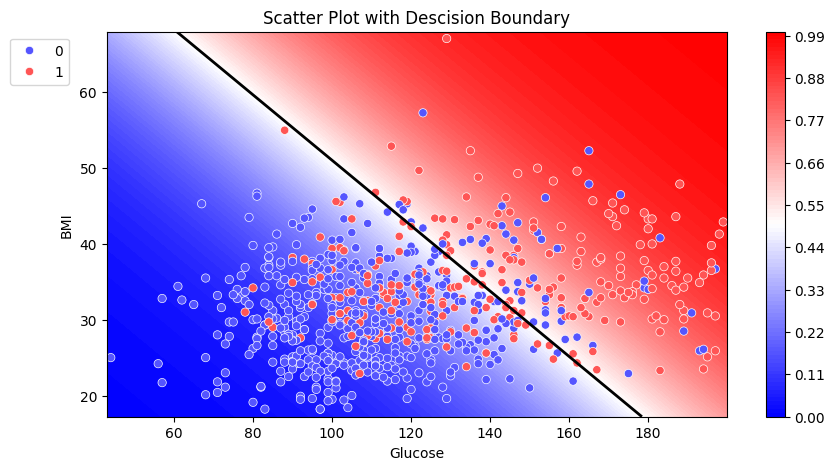

In [17]:
plot_probabilities(X, y, log_reg_2d)

In [18]:
# Создаем матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [19]:
# Создаем обьект класса LogisticRegression
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
# Обучаем модель минимизируя logloss
log_reg_full.fit(X,y)
# Делаем предсказание класса
y_pred = log_reg_full.predict(X)

In [20]:
# Создадим временную таблицу X
X_temp = X.copy()
# Добавим в эту таблицу результат предсказаний
X_temp['Prediction'] = y_pred
X_temp.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Prediction
752,5,139.0,64.0,35.0,28.6,0.411,26,0
753,1,96.0,122.0,29.0,22.4,0.207,27,0
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1
756,0,125.0,96.0,29.0,22.5,0.262,21,0


In [24]:
# Задание 2.9
task_data = pd.read_csv('C:\\IDE\\data\\Block_4\\task_data.csv')
task_data.head()

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0


In [25]:
X = task_data.drop(['SNo', 'y'], axis=1)
y = task_data['y']

In [34]:
lnm_stc_grad = linear_model.LogisticRegression(random_state=42, solver='sag')
lnm_stc_grad.fit(X,y)
lnm_stc_grad.predict(X)

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.])

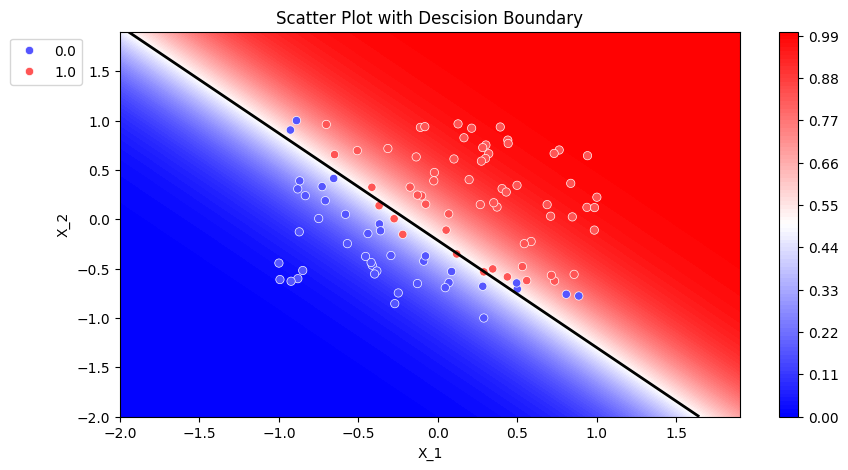

In [35]:
plot_probabilities(X, y, lnm_stc_grad)

### <center>3.Метрики классификации. Преимущества и недостатки логистической регрессии<center>
#### <center>Ошибки I и II рода с точки зрения классификации<center>
#### <center>Метрики классификации<center>